In [1]:
from qiskit import IBMQ
import numpy as np
from math import *
#from copy import de
from qiskit import *
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import scipy as sp

In [3]:
# save account information, only need to run it if you have never run the program before
#IBMQ.save_account('09a3c97aaca8263b86df5c917c29e776bc22b68bffa6f2ae10cd35257e3df016cd4b62e88373ee60674edbf02d29b3fa5423068484ffde54a447e2d2c3320c6b',overwrite=True)
IBMQ.save_account("757bb52f2bf116d41cd2649d5aa6dcaba2e31d86fb2f3858d68b9edff714d7db8096bf4105d47c77c9a5041c6bed5f6b2d4caf453d6bdac5624428741914fdf8",overwrite=True)


In [2]:
#Load Account
provider = IBMQ.load_account()
provider.backends(simulator=False)
#backend = provider.get_backend('ibmqx2')
backend = provider.get_backend('ibmq_16_melbourne')

In [3]:
#5 qubit system initialization
q = QuantumRegister(5)
c = ClassicalRegister(5)
circ = QuantumCircuit(q,c)
circ.draw()
#create random circuits
# 6 cylcles of random circuits
for k in range(0,5):
    # for every qubit, add a random unitary
    for i in range(0,5):    
        u = quantum_info.random.utils.random_unitary(2).data
        circ.squ(u,q[i])
    # apply CNOT on first and second qubit
    circ.cx(q[0],q[1])
    # apply CNOT on fourth and fifth qubit
    circ.cx(q[3],q[4])
    # apply CNOT on the third and a random qubit
    j = 2
    while j==2:
        j = np.random.randint(0,5)
    print(j)
    circ.cx(q[2],q[j])


1
3
3
0
4


In [4]:
#run it on statevector simulator to work out the state amplitude
circuit = circ

# Retrieve the statevector_simulator backend
backend = Aer.get_backend('statevector_simulator')

result = execute(circuit, backend, shots=1000).result()

# Get the statevector from result().
statevector = result.get_statevector(circuit)

# Normalize statevector to receive the true probabilities.

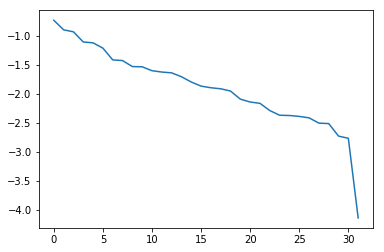

In [5]:
#normalize(state_raw with initial order) and plot(state with sorted order)
state = []
for i in statevector:
    state.append(-np.abs(i)**2)
state_raw = np.array(state)
state = np.sort(state_raw)
state_raw = -state_raw
state = - state
plt.plot(np.log10(state))


In [6]:
#Apply measurement (For solving state amplitudes, you should not run it)
#After the simulation,you should run it to add measurement gates on the circuit so that you can run it on IBM device
for i in range(0,5):
    circ.measure(q[i],c[i])

circ.draw()

In [8]:
#Run it on IBM
backend = provider.get_backend('ibmqx2')
job = execute(circ, backend, shots=1000)
result = job.result().get_counts()
print(result)


{'11011': 17, '00000': 26, '11101': 33, '10011': 10, '00100': 6, '11111': 10, '10110': 20, '10001': 10, '11100': 10, '00001': 19, '00111': 5, '01101': 11, '10100': 8, '01001': 33, '00010': 124, '00101': 10, '00011': 10, '11010': 107, '10111': 12, '01011': 18, '01111': 7, '11001': 15, '10101': 36, '10000': 7, '01000': 23, '01010': 132, '01100': 8, '10010': 79, '11000': 16, '01110': 82, '11110': 58, '00110': 38}


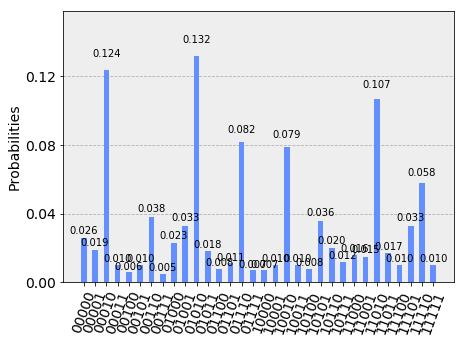

In [9]:
#Histogram
from qiskit.visualization import plot_histogram
plot_histogram(result)

In [10]:
# Data cleaning state(st) corresponding counts and corresponding probability
st = []
counts=[]
prob = []
for i in range(0,2**5):
    s = '00000'
    n = np.binary_repr(i)
    
    print(s[0:5-len(n)]+n)
    sn = s[0:5-len(n)]+n
    st.append(sn)
    counts.append(result[sn])
    prob.append(-state_raw[i])
#d,d1

00000
00001
00010
00011
00100
00101
00110
00111
01000
01001
01010
01011
01100
01101
01110
01111
10000
10001
10010
10011
10100
10101
10110
10111
11000
11001
11010
11011
11100
11101
11110
11111


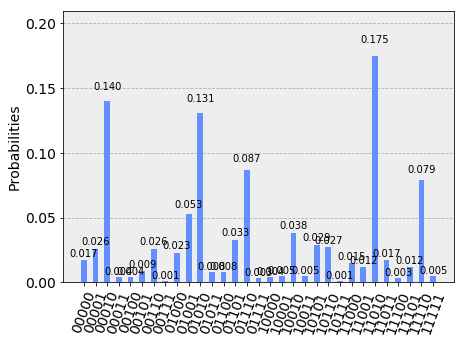

In [12]:
#Run it on qasm simulator to simulate results on classical computer
backend = Aer.get_backend('qasm_simulator')
#backend = Aer.get_backend('statevector_simulator')
job1 = execute(circ, backend, shots=1000)
result1 = job1.result()
#outputstate = result.get_qasm(circ, decimals=3)
#statevector = result1.get_statevector(circ)
plot_histogram(result1.get_counts())

In [257]:
#10 qubit system initialization
q = QuantumRegister(15)
c = ClassicalRegister(15)
circ = QuantumCircuit(q,c)
#create random circuits
# 10 cylcles of random circuits
for k in range(0,40):
    # for every qubit, add a random unitary
    for i in range(2,13):
        if i != 7:
            u = quantum_info.random.utils.random_unitary(2).data
            circ.squ(u,q[i])
    # apply CNOT on the third and a random qubit\
    used = []
    ranlist = []
    for l in range(9):
        ranlist.append(np.random.randint(2,13))
    for i in ranlist:
        if i != 7:
            k = np.random.randint(0,4)
            if k == 3:
            #print("A")
                j = 14-i
            elif i == 8:
            #print("B")
                j = 9
            elif i == 12:
            #print("C")
                j = 11
            elif i== 2:
            #print("D")
                j = 3
            elif i == 6:
            #print("E")
                j = 5
            else:
            #print("F")
                j = i + (-1)**k
            if (j not in used) and (i not in used):
                print(i,j)
                #print(used)
                circ.cx(q[i],q[j])
                used.append(j)
                used.append(i)

8 6
4 5
2 3
9 10
10 9
2 12
6 5
4 10
9 5
11 12
11 10
5 6
8 6
12 11
5 9
2 3
9 10
5 6
6 5
8 9
4 10
10 11
5 6
3 4
11 3
6 8
9 10
9 10
11 12
6 5
3 4
5 9
11 12
8 6
4 10
12 11
3 2
8 9
2 3
8 9
8 9
5 6
10 11
4 3
4 5
8 9
5 6
11 10
4 3
9 8
12 2
10 4
3 4
6 8
10 11
4 5
8 9
6 5
8 9
10 11
8 9
3 2
11 10
4 5
11 12
8 6
2 3
9 10
5 4
10 11
9 8
2 3
6 8
4 5
11 3
12 2
10 9
4 5
8 9
10 11
12 2
12 11
8 9
4 5
6 5
10 11
8 9
2 3
2 3
6 5
8 9
3 4
6 5
2 12
9 10
5 9
3 11
12 2
8 6
5 6
8 9
2 3
11 12
3 2
8 9
11 12
5 4
11 3
6 5
8 9
12 11
3 4
5 6
9 10
11 3
6 5
10 9
6 5
9 8
2 3
10 11
8 9
5 6
2 3
9 10
2 3
5 4
4 5
2 3
6 8
11 10
8 9
11 10
5 6
2 3


In [258]:
#simulate prob apm.
circuit = circ

# Retrieve the statevector_simulator backend
backend = Aer.get_backend('statevector_simulator')

result = execute(circuit, backend, shots=1000).result()

# Get the statevector from result().
statevector = result.get_statevector(circuit)

In [259]:
state = []
for i in statevector:
    if i != 0:
        state.append(np.abs(i)**2)
len(state)

1024

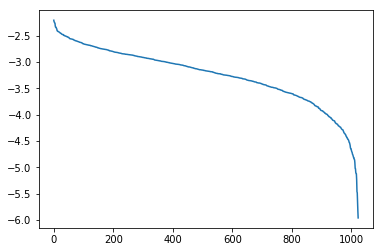

In [260]:
state_raw = np.array(state)
state = np.array(state)
state = np.sort(-state)
plt.plot(np.log10(-state))

(array([189., 154., 138.,  97.,  85.,  67.,  66.,  43.,  38.,  24.,  27.,
         18.,  14.,  12.,  12.,   8.,   8.,   6.,   6.,   1.,   2.,   1.,
          2.,   1.,   0.,   0.,   2.,   1.,   1.,   1.]),
 array([1.12315315e-03, 2.14308064e-01, 4.27492975e-01, 6.40677887e-01,
        8.53862798e-01, 1.06704771e+00, 1.28023262e+00, 1.49341753e+00,
        1.70660244e+00, 1.91978735e+00, 2.13297226e+00, 2.34615718e+00,
        2.55934209e+00, 2.77252700e+00, 2.98571191e+00, 3.19889682e+00,
        3.41208173e+00, 3.62526664e+00, 3.83845155e+00, 4.05163646e+00,
        4.26482138e+00, 4.47800629e+00, 4.69119120e+00, 4.90437611e+00,
        5.11756102e+00, 5.33074593e+00, 5.54393084e+00, 5.75711575e+00,
        5.97030066e+00, 6.18348558e+00, 6.39667049e+00]),
 <a list of 30 Patch objects>)

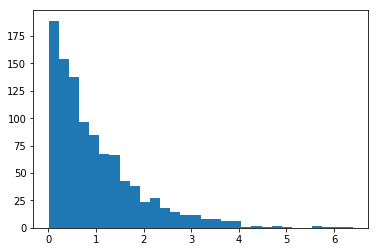

In [261]:
plt.hist(2**10*abs(state), bins=30)

In [265]:
#Apply measurement
for i in [2,3,4,5,6,8,9,10,11,12]:
    circ.measure(q[i],c[i])

circ.draw()

In [328]:
backend = provider.get_backend('ibmq_16_melbourne')
job = execute(circ, backend, shots=8190)

In [329]:
result2 = job.result().get_counts()

In [334]:
# Data cleaning state(st) corresponding counts(counts_1) and corresponding probability(prob_1)
st = []
counts=[]
prob = []
for i in range(0,2**15):
    s = '000000000000000'
    n = np.binary_repr(i)
    
    #print(s[0:5-len(n)]+n)
    sn = s[0:15-len(n)]+n
    #st.append(sn)
    prob.append(np.abs(statevector[i])**2)
    try:
        counts.append(result2[sn])
    except:
        counts.append(0)
    #counts.append(result[sn])
    #prob.append(-state_raw[i])
#d,d1
counts_1 = []
prob_1 = []
for i in range(len(prob)):
    if prob[i]!= 0:
        prob_1.append(prob[i])
        counts_1.append(counts[i])

In [338]:
np.savetxt("10-qubits_counts.csv",counts_1)

In [59]:
backend = qi.Aer.get_backend('qasm_simulator')
job1 = execute(circ, backend, shots=1000000)
result1 = job1.result().get_counts()

#print(result1)
#plot_histogram(result1)

In [ ]:
#Junk

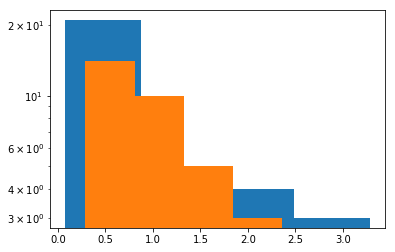

In [32]:
plt.hist(32*abs(d1)/5000, bins=4)
plt.hist(32*abs(d)/5000, bins=4)
plt.yscale('log')

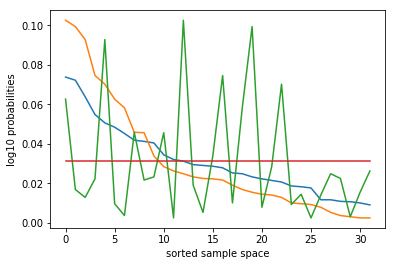

In [31]:
plt.xlabel('sorted sample space')
plt.ylabel('log10 probabilities')
plt.plot(abs(sdata)/5000)
plt.plot(abs(sdata1)/5000)
plt.plot(abs(d1)/5000)
d3 = 1/32*np.ones((32,1))
plt.plot(d3)
#plt.plot(-2.70204208+a*0.05751219)
#plt.plot(sp.odr.odr(np.exp(), -1, sdata, a))

In [52]:
data1 = np.sort(data1)
#cross entropy
p = data1
s = 0
count = 0
for i in data1:
    s+=i*p[count]
    count += 1
print(s/(10000*10000)*2**10-1)

1.38368768
